In [1]:
import random

%matplotlib inline
import networkx as nx

# Lab 7: Solutions



## 2. Exercises 
### Exercise 2.1: Girvan-Newman clustering

How would you check whether indeed all bipartitions in the list of all possible partitions we created with my_modularity are the same (our `partition_sequence`)? 
Write a code that checks how many bipartitions are there and then checks whether or not they are identical.

In [ ]:
# This cell assumes that you have the rest of the lab in the same notebook 
# so go ahead and just copy paste it into your notebook. 
# Otherwise you'll get an error. 

bipartitions = []  # List to store all bipartitions

for partition in partition_sequence:
    if len(partition) == 2:  # Check if the partition is a bipartition
        bipartitions.append(partition)  # Store it in the list

bipartitions  # This now contains all bipartitions

print(bipartitions)
print(len(bipartitions))


sorted_bipartitions = {tuple(sorted(map(tuple, partition))) for partition in bipartitions}

if len(sorted_bipartitions) == 1:
    print("All bipartitions are identical.")
else:
    print("Bipartitions are not identical.")


NameError: name 'partition_sequence' is not defined

### Exercise 2.2: Kernighan-Lin algorithm 
Find the best bisection of Zachary's karate club network by applying Kernighan-Lin algorithm. 
You can use the `kernighan_lin_bisection()` of NetworkX. 

What is the modularity of this partition? 

Generate two plots, one with the benchmark and one with the Kernighan clustering. 
Compare the resulting from this bipartition with the benchmark (the natural split that took place in the karate network).

What are the differences? 

What does they tell us about the clustering algorithms in social networks? 

What do it tell us about the nodes in question? 

#### Answers

In [14]:
# You can restart your kernel here to not get confused if you're keeping your answers in the same notebook   
import networkx as nx
myKarateGraph = nx.karate_club_graph()
myKernighanPartition = nx.community.kernighan_lin_bisection(myKarateGraph)
print("My Kernighan partition is:", myKernighanPartition)
print("The modularity is:",  nx.community.quality.modularity(myKarateGraph, myKernighanPartition))

My Kernighan partition is: ({32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21})
The modularity is: 0.3998332115215232


In [15]:
myKernighanPartitionMap = {}
for idx, cluster_nodes in enumerate(myKernighanPartition):
    for node in cluster_nodes:
        myKernighanPartitionMap[node] = idx
print(myKernighanPartitionMap)

{32: 0, 33: 0, 8: 0, 14: 0, 15: 0, 18: 0, 20: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 16: 1, 17: 1, 19: 1, 21: 1}


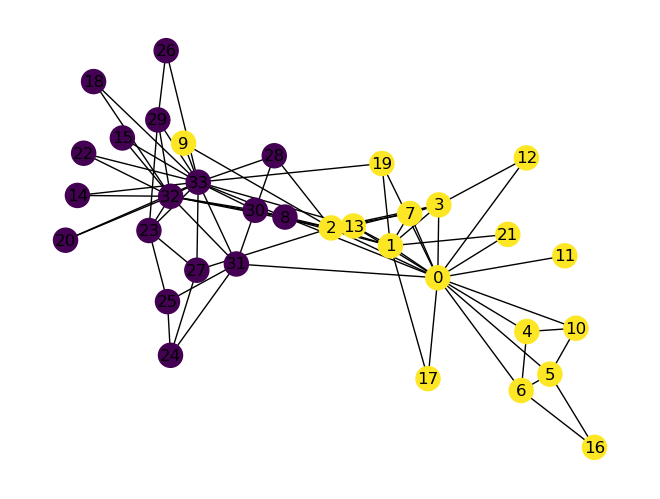

In [16]:
node_colors = [myKernighanPartitionMap [n] for n in myKarateGraph.nodes()]
nx.draw(myKarateGraph, with_labels=True, node_color=node_colors)

Text(0.5, 1.0, 'Actual communities')

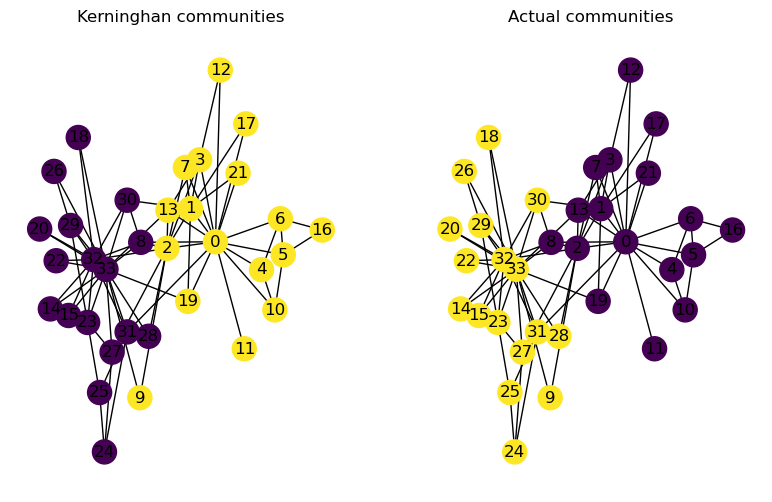

In [17]:
import matplotlib.pyplot as plt # Remember for this to run, you need matplotlib installed in the virtual environment in which you're running your NA notebooks

pos = nx.layout.spring_layout(myKarateGraph)
fig = plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1) # plt.subplot(nrows, ncols, index)
node_colors = [myKernighanPartitionMap[n] for n in myKarateGraph.nodes()]
nx.draw(myKarateGraph, with_labels=True, node_color=node_colors, pos=pos)
plt.title('Kerninghan communities')

plt.subplot(1, 3, 2)
node_colors = [myKarateGraph.nodes[n]['club'] == 'Officer' for n in myKarateGraph.nodes()]
nx.draw(myKarateGraph, with_labels=True, node_color=node_colors, pos=pos)
plt.title('Actual communities')

Kerninghan algorithm correctly predicted most of the nodes, besides nodes 8 and 9. Depending on the layout used, they both tend toppear in the middle of the network.


Node 8 stayed with Mr. Hi (node 0), while node 9 actually left with the officer (node 33).

Background: 
As mentioned in the tutorial above, Zachary in his original paper from 1977 correctly predicted each member's decision except member #9 (node 8), who stayed with Mr. Hi instead of the officer due to their personal situation (black belt).

We do not know what was the motivation of our node 9, besides that this individual (individual 10 in Zachary's paper) is listed as without having any pre-existing fractional preferences, but ended up leaving with the officer (node 33). 


The position of nodes 8 and 9 in these visualisation might make us think that these nodes have high betweenness centrality, or closeness centrality, but they don't. 

Let's check which node has the highest values for closeness and betweenness: 



In [12]:
centrality = nx.betweenness_centrality(myKarateGraph)
max_node = max(centrality, key=centrality.get)
max_value = centrality[max_node]
print(centrality)
print(f"Node with highest betweenness centrality is node {max_node} (Centrality: {max_value})")


{0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976909, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.30407497594997596}
Node with highest betweenness centrality is node 0 (Centrality: 0.43763528138528146)


In [13]:
centrality = nx.closeness_centrality(myKarateGraph)
max_node = max(centrality, key=centrality.get)
max_value = centrality[max_node]
print(centrality)
print(f"Node with highest closeness centrality is node {max_node} (Centrality: {max_value})")

{0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0.38372093023255816, 6: 0.38372093023255816, 7: 0.44, 8: 0.515625, 9: 0.4342105263157895, 10: 0.3793103448275862, 11: 0.36666666666666664, 12: 0.3707865168539326, 13: 0.515625, 14: 0.3707865168539326, 15: 0.3707865168539326, 16: 0.28448275862068967, 17: 0.375, 18: 0.3707865168539326, 19: 0.5, 20: 0.3707865168539326, 21: 0.375, 22: 0.3707865168539326, 23: 0.39285714285714285, 24: 0.375, 25: 0.375, 26: 0.3626373626373626, 27: 0.4583333333333333, 28: 0.4520547945205479, 29: 0.38372093023255816, 30: 0.4583333333333333, 31: 0.5409836065573771, 32: 0.515625, 33: 0.55}
Node with highest closeness centrality is node 0 (Centrality: 0.5689655172413793)



### Exercise 2.3: Modularity in Gephi

Export the network data in the format of your choice and import it into Gephi. Test how the modularity function works there. 
Does it use any of the functions we talked about today? 
What are the differences? 


No it does not. Gephi uses an algorithm introduced by Vincent D Blondel, Jean-Loup Guillaume, Renaud Lambiotte, Etienne Lefebvre, Fast unfolding of communities in large networks, in Journal of Statistical Mechanics: Theory and Experiment 2008 (10), P1000

It also uses the resolution, as discussed in R. Lambiotte, J.-C. Delvenne, M. Barahona Laplacian Dynamics and Multiscale Modular Structure in Networks 2009.